In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
original_dataset = pd.read_csv("./ankara_dataset.csv")
original_dataset

,Country,City,Month,Day,Year,AvgTemperature
0,Turkey,Ankara,1,1,1995,7.888889
1,Turkey,Ankara,1,2,1995,10.500000
2,Turkey,Ankara,1,3,1995,8.166667
3,Turkey,Ankara,1,4,1995,5.333333
4,Turkey,Ankara,1,5,1995,5.444444
...,...,...,...,...,...,...
9261,Turkey,Ankara,5,9,2020,10.500000
9262,Turkey,Ankara,5,10,2020,12.500000
9263,Turkey,Ankara,5,11,2020,15.333333
9264,Turkey,Ankara,5,12,2020,19.500000


In [3]:
org_dataset_edited = original_dataset.drop(columns=['Country', 'City'])
org_time_set = org_dataset_edited.drop(columns=['AvgTemperature'])
org_temp_set = original_dataset['AvgTemperature']
org_dataset_edited

,Month,Day,Year,AvgTemperature
0,1,1,1995,7.888889
1,1,2,1995,10.500000
2,1,3,1995,8.166667
3,1,4,1995,5.333333
4,1,5,1995,5.444444
...,...,...,...,...
9261,5,9,2020,10.500000
9262,5,10,2020,12.500000
9263,5,11,2020,15.333333
9264,5,12,2020,19.500000


In [4]:
# name of the temp column
temperature_column = 'AvgTemperature'

# defining a threshold for outliers (which can be adjusted based on what interval is required)
lower_bound = -50
upper_bound = 50

# Filter rows based on the temperature column
outliers_excluded = original_dataset[(original_dataset[temperature_column] >= lower_bound) & (original_dataset[temperature_column] <= upper_bound)]

# Save the filtered DataFrame back to a new CSV file or update the existing one
outliers_excluded.to_csv('ankara_edited.csv', index=False)

outliers_included = original_dataset[(original_dataset[temperature_column] <= lower_bound) | (original_dataset[temperature_column] >= upper_bound)]
outliers_included.to_csv('outlier_dataset.csv', index=False)

In [5]:
outlier_data = pd.read_csv("./outlier_dataset.csv")

In [6]:
ankara_edited = pd.read_csv("./ankara_edited.csv")
ankara_edited

,Country,City,Month,Day,Year,AvgTemperature
0,Turkey,Ankara,1,1,1995,7.888889
1,Turkey,Ankara,1,2,1995,10.500000
2,Turkey,Ankara,1,3,1995,8.166667
3,Turkey,Ankara,1,4,1995,5.333333
4,Turkey,Ankara,1,5,1995,5.444444
...,...,...,...,...,...,...
9231,Turkey,Ankara,5,9,2020,10.500000
9232,Turkey,Ankara,5,10,2020,12.500000
9233,Turkey,Ankara,5,11,2020,15.333333
9234,Turkey,Ankara,5,12,2020,19.500000


In [7]:
#making it all numeric now
# "THE" dataset ;)

dataset = ankara_edited.drop(columns=['Country', 'City'])
dataset

,Month,Day,Year,AvgTemperature
0,1,1,1995,7.888889
1,1,2,1995,10.500000
2,1,3,1995,8.166667
3,1,4,1995,5.333333
4,1,5,1995,5.444444
...,...,...,...,...
9231,5,9,2020,10.500000
9232,5,10,2020,12.500000
9233,5,11,2020,15.333333
9234,5,12,2020,19.500000


In [8]:
x = dataset.drop(columns=['AvgTemperature'])
y = dataset['AvgTemperature']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

predictions = model.predict(x_test)


# Make predictions on the entire dataset
all_predictions = model.predict(org_time_set)
# Identify outliers in the test set
outlier_mask = (org_temp_set <= lower_bound) | (org_temp_set >= upper_bound)
# Replace outliers with the predicted data
org_temp_set[outlier_mask] = all_predictions[outlier_mask]


specific_prediction = model.predict([[1,4,2018]]) #this is one of the days with an outlier
print(specific_prediction)

# error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

[4.11111111]
Mean Absolute Error: 1.9809403559403558


C:\Users\altar\AppData\Local\Temp\ipykernel_11656\2038950484.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org_temp_set[outlier_mask] = all_predictions[outlier_mask]
c:\Users\altar\Desktop\ML temp\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [21]:
# Display the updated dataset with predictions next to the average temperature values in the original dataset
org_dataset_w_prdctxs = org_dataset_edited.copy()  # creates a copy of the original dataset
org_dataset_w_prdctxs['PredictedTemperature'] = all_predictions  # adds a new column with the predictions

print("Updated Dataset with Predicted Temperatures:")
org_dataset_w_prdctxs

Updated Dataset with Predicted Temperatures:


,Month,Day,Year,AvgTemperature,Date,PredictedTemperature
0,1,1,1995,7.888889,1995-01-01,7.888889
1,1,2,1995,10.500000,1995-01-02,10.500000
2,1,3,1995,8.166667,1995-01-03,8.166667
3,1,4,1995,5.333333,1995-01-04,8.166667
4,1,5,1995,5.444444,1995-01-05,5.444444
...,...,...,...,...,...,...
9261,5,9,2020,10.500000,2020-05-09,9.444444
9262,5,10,2020,12.500000,2020-05-10,9.722222
9263,5,11,2020,15.333333,2020-05-11,15.333333
9264,5,12,2020,19.500000,2020-05-12,19.500000


In [22]:
org_dataset_w_prdctxs.to_csv('ankara_with_predictions.csv', index=False)

In [11]:
# Create a copy of the original dataset to keep non-outliers unchanged
updated_dataset = org_dataset_edited.copy()

# Identify outliers in the dataset
outlier_mask = (updated_dataset['AvgTemperature'] <= lower_bound) | (updated_dataset['AvgTemperature'] >= upper_bound)

# Create a new column with the original values
updated_dataset['UpdatedTemperature'] = updated_dataset['AvgTemperature']

# Replace outliers with the predicted data
updated_dataset.loc[outlier_mask, 'UpdatedTemperature'] = all_predictions[outlier_mask]

# Display the updated dataset with the new column
print("Updated Dataset with Original and Predicted Temperatures:")

# Save the updated dataset to a new CSV file
updated_dataset.to_csv('ankara_updated.csv', index=False)

Updated Dataset with Original and Predicted Temperatures:


In [12]:
corrected_dataset = pd.read_csv("./ankara_updated.csv")
corrected_dataset

,Month,Day,Year,AvgTemperature,UpdatedTemperature
0,1,1,1995,7.888889,7.888889
1,1,2,1995,10.500000,10.500000
2,1,3,1995,8.166667,8.166667
3,1,4,1995,5.333333,5.333333
4,1,5,1995,5.444444,5.444444
...,...,...,...,...,...
9261,5,9,2020,10.500000,10.500000
9262,5,10,2020,12.500000,12.500000
9263,5,11,2020,15.333333,15.333333
9264,5,12,2020,19.500000,19.500000


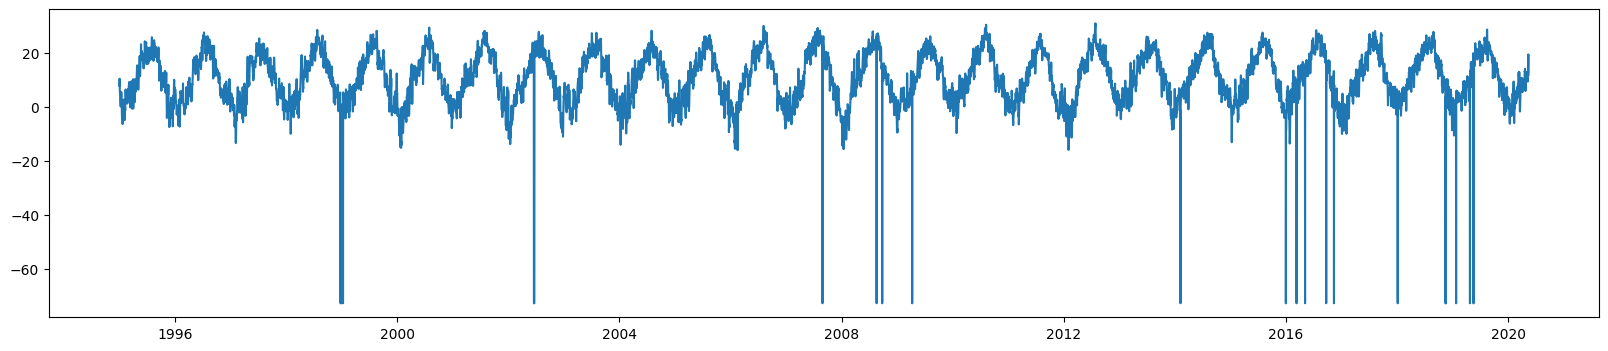

In [13]:
#plotting
plt.figure(figsize=(20, 4))

#Creating a datetime single-column combining year month and day
org_dataset_edited['Date'] = pd.to_datetime(org_dataset_edited[['Month', 'Day', 'Year']])

#plotting actual data now (with all the mfing outliers)
plt.plot(org_dataset_edited['Date'], org_dataset_edited['AvgTemperature'], label='Temperatures')
plt.show()

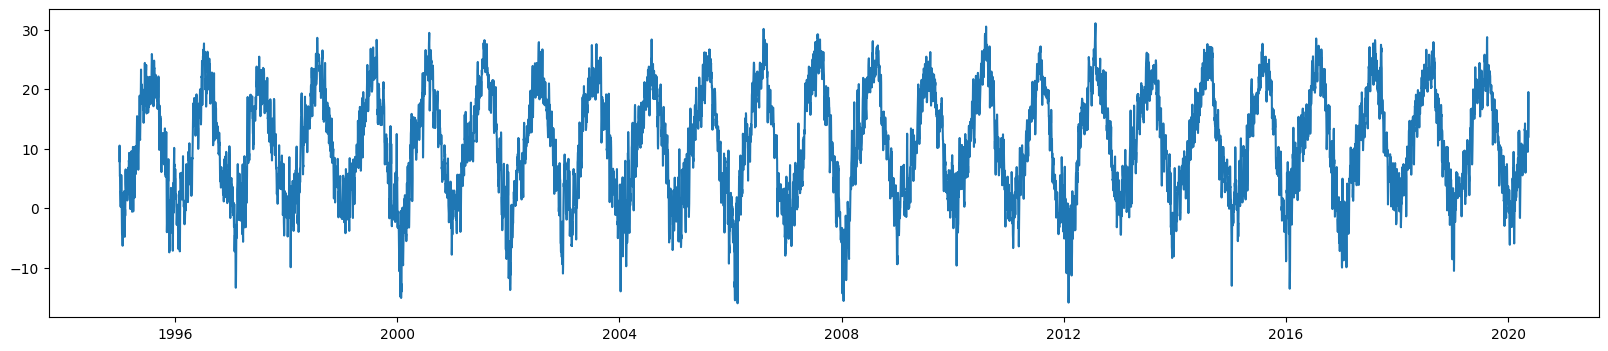

In [15]:
plt.figure(figsize=(20, 4))

dataset['Date'] = pd.to_datetime(dataset[['Month', 'Day', 'Year']])

#plotting
plt.plot(dataset['Date'], dataset['AvgTemperature'], label='Corrected Temperatures')
plt.show()

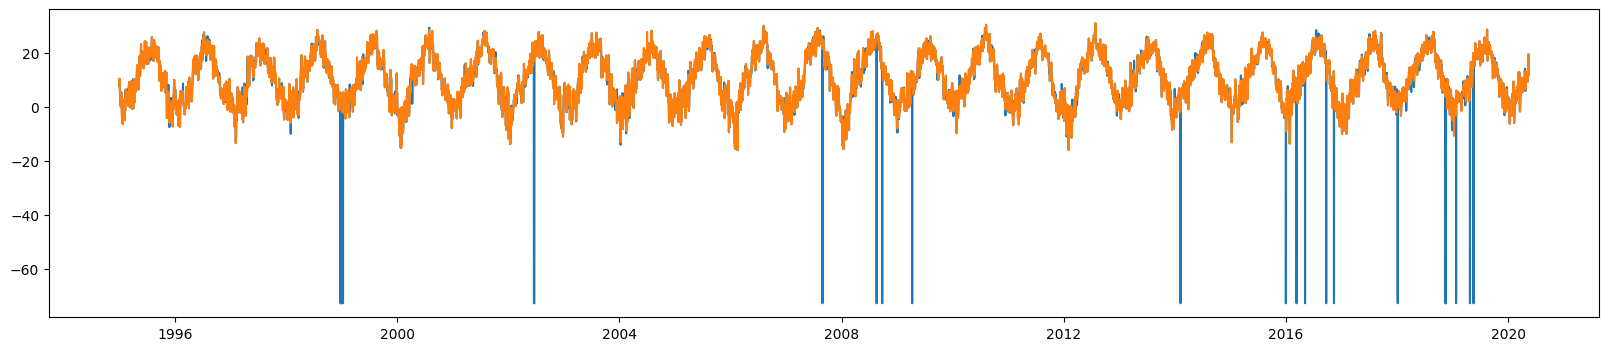

In [16]:
#plotting the mfing plots
plt.figure(figsize=(20, 4))

#Creating a datetime single-column combining year month and day
org_dataset_edited['Date'] = pd.to_datetime(org_dataset_edited[['Month', 'Day', 'Year']])

#plotting actual data now (with all the mfing outliers)
plt.plot(org_dataset_edited['Date'], org_dataset_edited['AvgTemperature'], label='Temperatures')

#creating a datetime ...
org_dataset_w_prdctxs['Date'] = pd.to_datetime(org_dataset_w_prdctxs[['Month', 'Day', 'Year']])

#plotting ...
plt.plot(org_dataset_w_prdctxs['Date'], org_dataset_w_prdctxs['PredictedTemperature'], label='Corrected Temperatures')

plt.show()

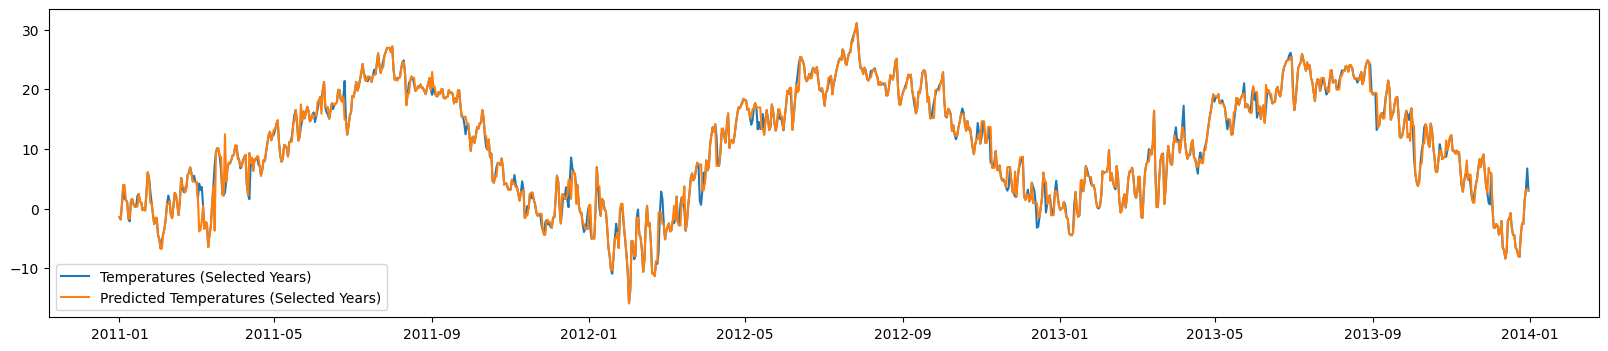

In [17]:
# Plotting the mfing plots
plt.figure(figsize=(20, 4))

# Creating a datetime single-column combining year month and day for org_dataset_edited
org_dataset_edited['Date'] = pd.to_datetime(org_dataset_edited[['Month', 'Day', 'Year']])

# Plotting actual data now (with all the outliers) for specific years
selected_years = [2011, 2012, 2013]  # Add the years you want to plot

# Filter data for the selected years
org_selected_years = org_dataset_edited[org_dataset_edited['Year'].isin(selected_years)]

plt.plot(org_selected_years['Date'], org_selected_years['AvgTemperature'], label='Temperatures (Selected Years)')

# Creating a datetime single-column combining year month and day for updated_dataset
org_dataset_w_prdctxs['Date'] = pd.to_datetime(org_dataset_w_prdctxs[['Month', 'Day', 'Year']])

# Filter data for the selected years
updated_selected_years = org_dataset_w_prdctxs[org_dataset_w_prdctxs['Year'].isin(selected_years)]

# Plotting corrected temperatures for specific years
plt.plot(updated_selected_years['Date'], updated_selected_years['PredictedTemperature'], label='Predicted Temperatures (Selected Years)')

plt.legend()
plt.show()

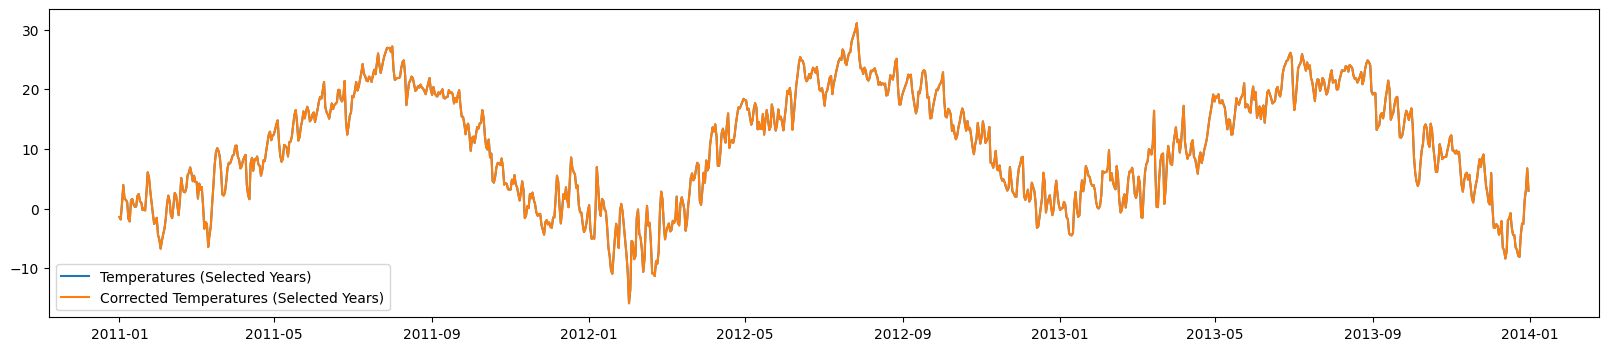

In [18]:
# Plotting the mfing plots
plt.figure(figsize=(20, 4))

# Creating a datetime single-column combining year month and day for org_dataset_edited
org_dataset_edited['Date'] = pd.to_datetime(org_dataset_edited[['Month', 'Day', 'Year']])

# Plotting actual data now (with all the outliers) for specific years
selected_years = [2011, 2012, 2013]  # Add the years you want to plot

# Filter data for the selected years
org_selected_years = org_dataset_edited[org_dataset_edited['Year'].isin(selected_years)]

plt.plot(org_selected_years['Date'], org_selected_years['AvgTemperature'], label='Temperatures (Selected Years)')


# Creating a datetime single-column combining year month and day for updated_dataset
corrected_dataset['Date'] = pd.to_datetime(corrected_dataset[['Month', 'Day', 'Year']])

# Filter data for the selected years
updated_selected_years = corrected_dataset[corrected_dataset['Year'].isin(selected_years)]

# Plotting corrected temperatures for specific years
plt.plot(updated_selected_years['Date'], updated_selected_years['UpdatedTemperature'], label='Corrected Temperatures (Selected Years)')

plt.legend()
plt.show()

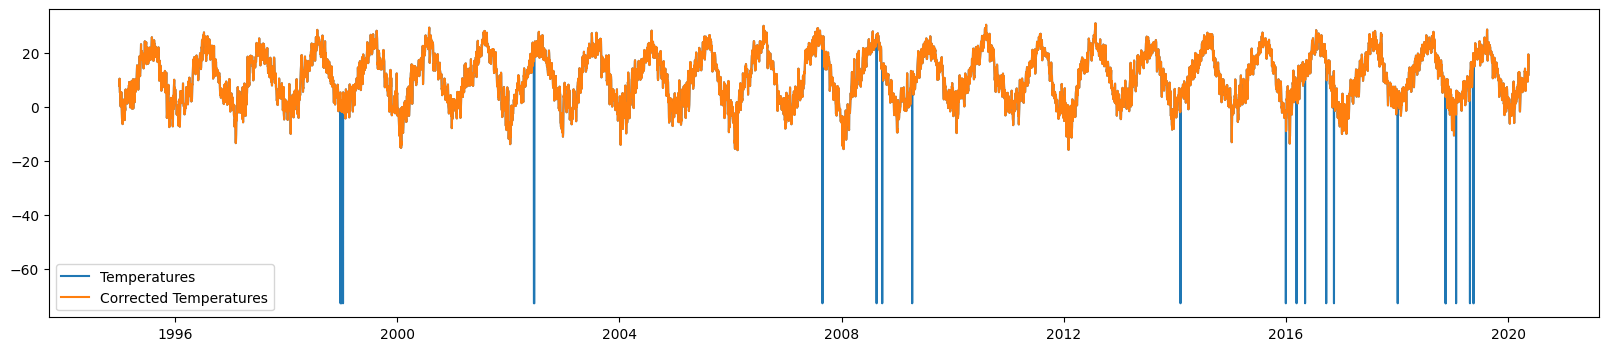

In [19]:
#plotting the mfing plots
plt.figure(figsize=(20, 4))

#Creating a datetime single-column combining year month and day
org_dataset_edited['Date'] = pd.to_datetime(org_dataset_edited[['Month', 'Day', 'Year']])

#plotting
plt.plot(org_dataset_edited['Date'], org_dataset_edited['AvgTemperature'], label='Temperatures')

#...
corrected_dataset['Date'] = pd.to_datetime(corrected_dataset[['Month', 'Day', 'Year']])

#plotting
plt.plot(corrected_dataset['Date'], corrected_dataset['UpdatedTemperature'], label='Corrected Temperatures')

plt.legend()
plt.show()